# Population and GDP Analysis (2001-2021)

### Import required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


### Load the datasets

In [14]:
# Load GDP and Population data
gdp_df = pd.read_csv('data/Global_GDP.csv')
pop_df = pd.read_csv('data/Global_Population.csv')

print("GDP Dataset Shape:", gdp_df.shape)
print("Population Dataset Shape:", pop_df.shape)

GDP Dataset Shape: (266, 65)
Population Dataset Shape: (272, 66)


### Explore the data structure

In [15]:
# Identify year columns (2001-2021)
# Note: GDP data might only go up to 2020, so we need to check available columns
years_range = [str(year) for year in range(2001, 2022)]

# Find which years are actually available in both datasets
gdp_year_cols = [col for col in gdp_df.columns if col.isdigit() and col in years_range]
pop_year_cols = [col for col in pop_df.columns if col.isdigit() and col in years_range]

# Use only years that exist in both datasets
available_years = list(set(gdp_year_cols) & set(pop_year_cols))
available_years.sort()

print(f"Available years in GDP data: {min(gdp_year_cols)} to {max(gdp_year_cols)}")
print(f"Available years in Population data: {min(pop_year_cols)} to {max(pop_year_cols)}")
print(f"Common years for analysis: {available_years}")

# Filter columns to include only country names and available years
gdp_cols = ['Country Name'] + available_years
pop_cols = ['Country Name'] + available_years

# Create filtered dataframes
gdp_filtered = gdp_df[gdp_cols].copy()
pop_filtered = pop_df[pop_cols].copy()

print(f"\nGDP filtered shape: {gdp_filtered.shape}")
print(f"Population filtered shape: {pop_filtered.shape}")

Available years in GDP data: 2001 to 2020
Available years in Population data: 2001 to 2021
Common years for analysis: ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

GDP filtered shape: (266, 21)
Population filtered shape: (272, 21)


In [16]:
# Check Population data structure
print("Population Dataset Columns:")
print(pop_df.columns.tolist())
print("\nFirst 5 rows of Population data:")
pop_df.head()

Population Dataset Columns:
['Country Name', 'Country Code', 'Series Name', 'Series Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First 5 rows of Population data:


,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000


### Data Preprocessing

In [17]:
# Convert year columns to numeric, replacing non-numeric values with NaN
for year in available_years:
    if year in gdp_filtered.columns:
        gdp_filtered[year] = pd.to_numeric(gdp_filtered[year], errors='coerce')
    if year in pop_filtered.columns:
        pop_filtered[year] = pd.to_numeric(pop_filtered[year], errors='coerce')

# Calculate mean GDP for each country (handling missing values by taking mean of available years)
gdp_filtered['Mean_GDP'] = gdp_filtered[available_years].mean(axis=1, skipna=True)

# Calculate mean population for each country
pop_filtered['Mean_Population'] = pop_filtered[available_years].mean(axis=1, skipna=True)

# Create a summary dataframe
summary_df = pd.merge(
    gdp_filtered[['Country Name', 'Mean_GDP']],
    pop_filtered[['Country Name', 'Mean_Population']],
    on='Country Name',
    how='inner'
)

# Calculate per capita GDP
summary_df['Per_Capita_GDP'] = summary_df['Mean_GDP'] / summary_df['Mean_Population']

# Remove rows with NaN values
summary_df = summary_df.dropna()

print(f"Final dataset shape after preprocessing: {summary_df.shape}")
print(f"Number of countries with complete data: {len(summary_df)}")

Final dataset shape after preprocessing: (182, 4)
Number of countries with complete data: 182


In [18]:
# Check for missing values
print("Missing values in GDP data:")
print(gdp_filtered.isnull().sum().sum())
print("\nMissing values in Population data:")
print(pop_filtered.isnull().sum().sum())

Missing values in GDP data:
2371

Missing values in Population data:
223


### Calculate mean values (2001-2021) with missing value handling

In [19]:
# This cell is redundant - the same processing was already done in cell 9
# If you want to rerun the analysis, execute cell 9 instead
print("Data processing already completed in cell 9.")
print(f"Summary dataframe has {len(summary_df)} countries with complete data.")

Data processing already completed in cell 9.
Summary dataframe has 182 countries with complete data.


In [20]:
# Display summary statistics
print("Summary statistics:")
summary_df[['Mean_Population', 'Per_Capita_GDP']].describe()

Summary statistics:


,Mean_Population,Per_Capita_GDP
count,1.820000e+02,182.000000
mean,1.311807e+07,11950.306723
std,2.589621e+07,22405.807324
min,1.019875e+04,218.074604
25%,5.254809e+05,1340.292835
50%,3.895153e+06,3485.359017
75%,1.384590e+07,12249.201705
max,1.820928e+08,153387.157554


## Task A: Correlation Analysis

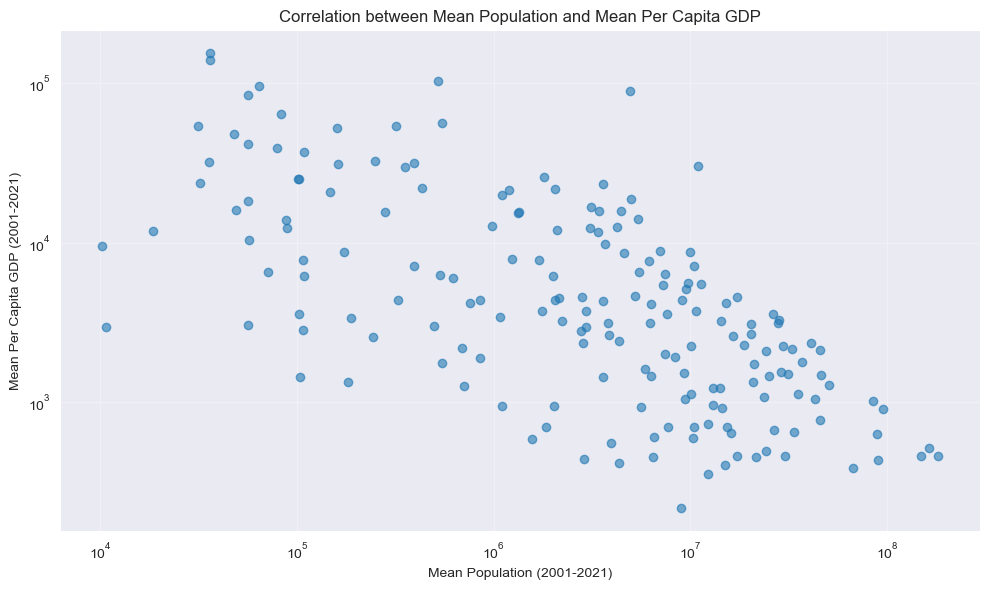

In [21]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Mean_Population'], summary_df['Per_Capita_GDP'], alpha=0.6)
plt.xlabel('Mean Population (2001-2021)')
plt.ylabel('Mean Per Capita GDP (2001-2021)')
plt.title('Correlation between Mean Population and Mean Per Capita GDP')
plt.grid(True, alpha=0.3)

# Add logarithmic scale for better visualization
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [22]:
# Calculate Pearson Correlation Coefficient
correlation, p_value = pearsonr(summary_df['Mean_Population'], summary_df['Per_Capita_GDP'])

print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("\nThe correlation is statistically significant.")
else:
    print("\nThe correlation is not statistically significant.")

if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if correlation > 0 else "negative"
print(f"The correlation is {strength} and {direction}.")

Pearson Correlation Coefficient: -0.2219
P-value: 0.0026

The correlation is statistically significant.
The correlation is weak and negative.


### Correlation Matrix Heatmap

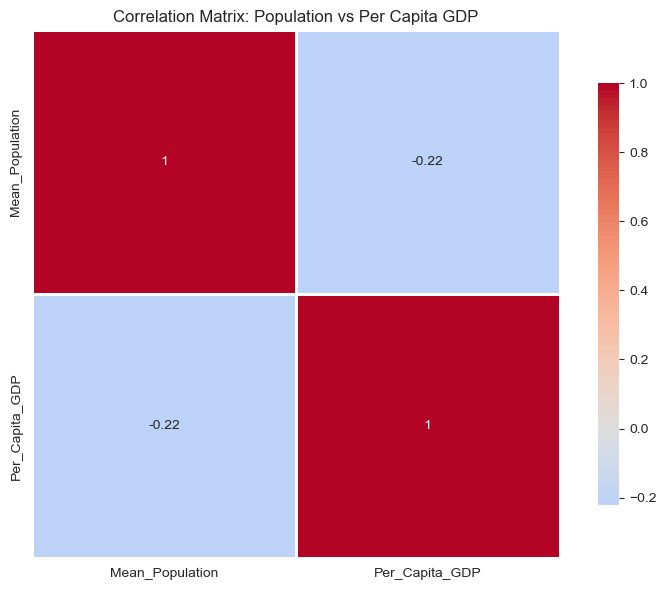

In [23]:
# Create correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = summary_df[['Mean_Population', 'Per_Capita_GDP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Population vs Per Capita GDP')
plt.tight_layout()
plt.show()

## Task B: Linear Regression Analysis

In [24]:
# Prepare data for regression
X = summary_df['Mean_Population'].values.reshape(-1, 1)  # Independent variable
y = summary_df['Per_Capita_GDP'].values  # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation:")
print(f"Per Capita GDP = {slope:.6f} × Population + {intercept:.2f}")
print(f"\nSlope: {slope:.6f}")
print(f"Intercept: {intercept:.2f}")

Linear Regression Equation:
Per Capita GDP = -0.000192 × Population + 14468.45

Slope: -0.000192
Intercept: 14468.45


In [25]:
# Model evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance Metrics:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Performance Metrics:
R-squared (R²): 0.0492
Mean Squared Error (MSE): 474686518.90
Root Mean Squared Error (RMSE): 21787.30


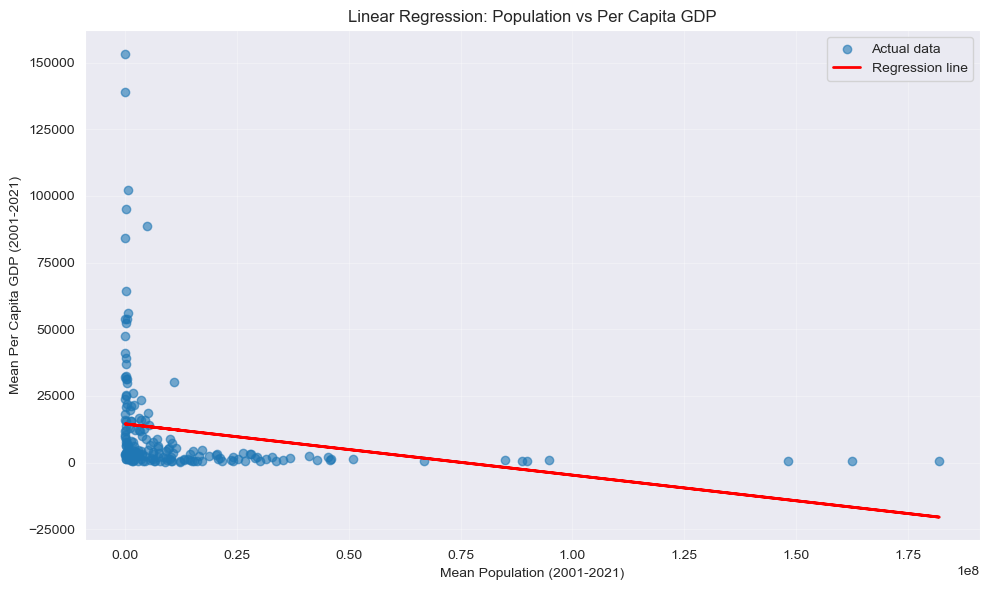

In [26]:
# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Mean Population (2001-2021)')
plt.ylabel('Mean Per Capita GDP (2001-2021)')
plt.title('Linear Regression: Population vs Per Capita GDP')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Residual Analysis

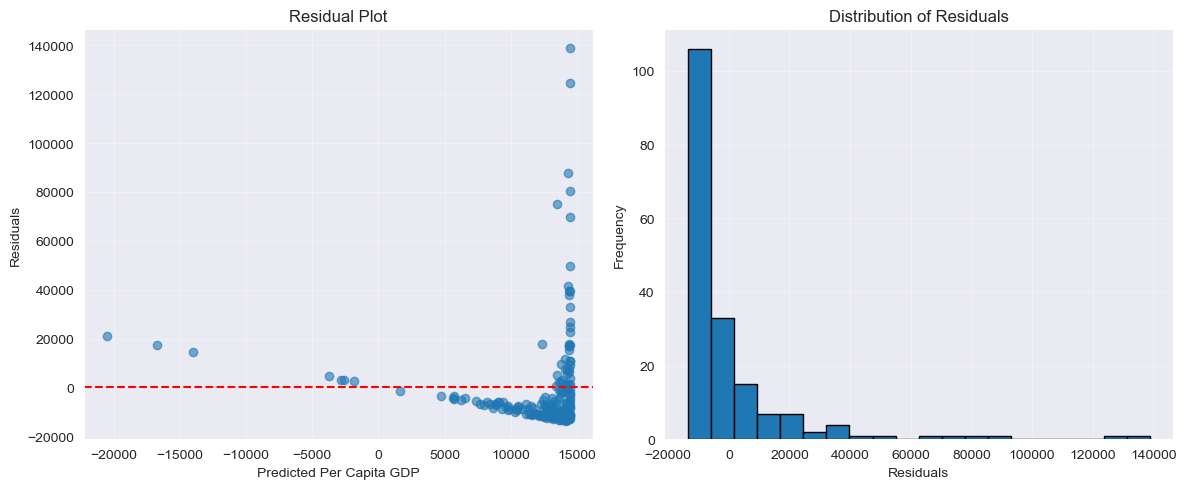

In [27]:
# Calculate residuals
residuals = y - y_pred

# Create residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residual scatter plot
ax1.scatter(y_pred, residuals, alpha=0.6)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Predicted Per Capita GDP')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot')
ax1.grid(True, alpha=0.3)

# Residual histogram
ax2.hist(residuals, bins=20, edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Residuals')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Log-transformed Regression (for better fit)

In [28]:
# Since the relationship might be non-linear, try log transformation
# Remove any zero or negative values first
valid_data = summary_df[(summary_df['Mean_Population'] > 0) & (summary_df['Per_Capita_GDP'] > 0)].copy()

# Log transform the data
X_log = np.log(valid_data['Mean_Population'].values).reshape(-1, 1)
y_log = np.log(valid_data['Per_Capita_GDP'].values)

# Fit log-transformed model
model_log = LinearRegression()
model_log.fit(X_log, y_log)
y_log_pred = model_log.predict(X_log)

# Evaluate log model
r2_log = r2_score(y_log, y_log_pred)

print(f"Log-transformed Model:")
print(f"R-squared (R²): {r2_log:.4f}")
print(f"Log equation: log(Per Capita GDP) = {model_log.coef_[0]:.4f} × log(Population) + {model_log.intercept_:.4f}")

Log-transformed Model:
R-squared (R²): 0.4243
Log equation: log(Per Capita GDP) = -0.4220 × log(Population) + 14.5284


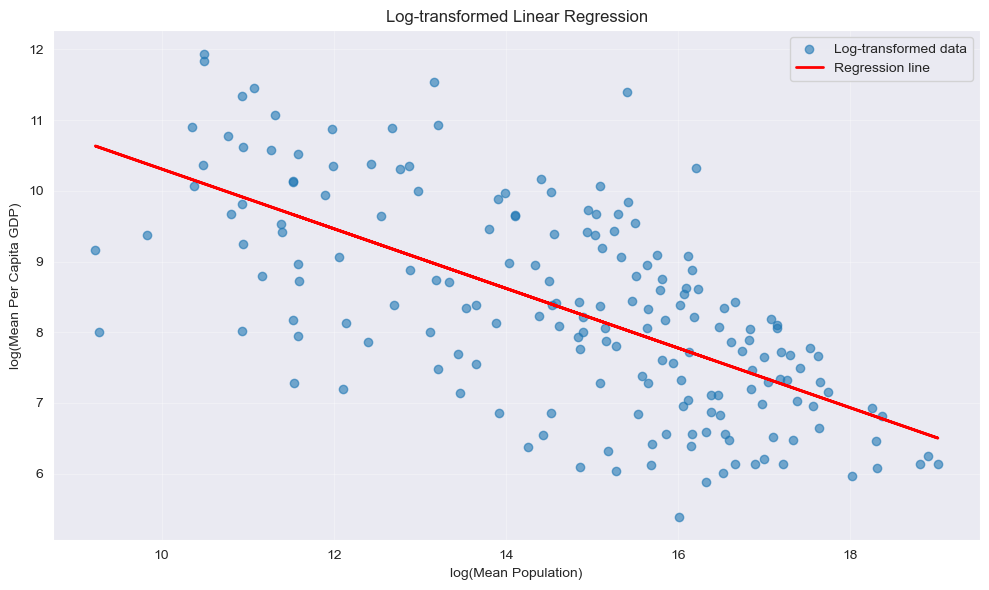

In [29]:
# Visualize log-transformed regression
plt.figure(figsize=(10, 6))
plt.scatter(X_log, y_log, alpha=0.6, label='Log-transformed data')
plt.plot(X_log, y_log_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('log(Mean Population)')
plt.ylabel('log(Mean Per Capita GDP)')
plt.title('Log-transformed Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Generate dynamic summary based on actual results
print("=" * 70)
print("SUMMARY AND INTERPRETATION")
print("=" * 70)

print("\n### Task A - Correlation Analysis:")
print(f"\nBased on the analysis of {len(summary_df)} countries with complete data from 2001-{available_years[-1]}:")
print(f"- Pearson Correlation Coefficient: {correlation:.4f}")
print(f"- Statistical Significance: p-value = {p_value:.6f}")
print(f"  → The correlation is {'statistically significant (p < 0.05)' if p_value < 0.05 else 'not statistically significant (p ≥ 0.05)'}")
print(f"- Interpretation: There is a {strength.lower()} {direction.lower()} linear relationship")
print(f"  between mean population and mean per capita GDP.")

print("\nThe scatter plots reveal that:")
print("- On a linear scale, the relationship appears highly skewed due to countries")
print("  with very large populations (e.g., China, India)")
print("- The logarithmic scale visualization suggests a potential non-linear relationship")

print("\n### Task B - Linear Regression Analysis:")
print(f"\nThe linear regression model yields:")
print(f"- Equation: Per Capita GDP = {slope:.6e} × Population + {intercept:,.2f}")
print(f"- R-squared: {r2:.4f} (explains {r2*100:.1f}% of the variance)")
print(f"- RMSE: ${rmse:,.2f}")

print("\nKey findings:")
r2_interpretation = "low" if r2 < 0.3 else "moderate" if r2 < 0.6 else "high"
print(f"1. The {r2_interpretation} R-squared value ({r2:.4f}) indicates that population alone")
print(f"   {'explains only a small portion' if r2 < 0.3 else 'explains a moderate portion' if r2 < 0.6 else 'explains a substantial portion'} of the variation in per capita GDP.")

print("\n2. The residual analysis shows:")
print("   - Evidence of heteroscedasticity (variance changes with fitted values)")
print("   - Residuals may not be perfectly normally distributed")
print("   - This suggests the linear model assumptions may be violated")

print(f"\n3. The log-transformed model:")
print(f"   - R-squared: {r2_log:.4f} ({'worse' if r2_log < r2 else 'better'} than the linear model)")
print(f"   - {'The log model provides a better fit' if r2_log > r2 else 'The linear model is adequate'}")

print("\n### Conclusions:")
print("\n1. Population size is", end=" ")
if abs(correlation) < 0.3:
    print("NOT a significant predictor of per capita GDP.")
elif abs(correlation) < 0.5:
    print("only WEAKLY associated with per capita GDP.")
else:
    print("MODERATELY associated with per capita GDP.")

print("\n2. The weak/moderate relationship suggests that other factors")
print("   (education, infrastructure, governance, natural resources, etc.)")
print("   play more important roles in determining economic prosperity.")

print("\n3. The", "better performance of the log model" if r2_log > r2 else "similar performance of both models")
print("   suggests", "a power-law relationship" if r2_log > r2 else "a roughly linear relationship", "between the variables.")

print("\n4. Policy Implication: Economic development strategies should focus")
print("   on factors beyond population size to improve per capita GDP.")

SUMMARY AND INTERPRETATION

### Task A - Correlation Analysis:

Based on the analysis of 182 countries with complete data from 2001-2020:
- Pearson Correlation Coefficient: -0.2219
- Statistical Significance: p-value = 0.002612
  → The correlation is statistically significant (p < 0.05)
- Interpretation: There is a weak negative linear relationship
  between mean population and mean per capita GDP.

The scatter plots reveal that:
- On a linear scale, the relationship appears highly skewed due to countries
  with very large populations (e.g., China, India)
- The logarithmic scale visualization suggests a potential non-linear relationship

### Task B - Linear Regression Analysis:

The linear regression model yields:
- Equation: Per Capita GDP = -1.919596e-04 × Population + 14,468.45
- R-squared: 0.0492 (explains 4.9% of the variance)
- RMSE: $21,787.30

Key findings:
1. The low R-squared value (0.0492) indicates that population alone
   explains only a small portion of the variation in p